Task 3: Cross-Country Comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load each cleaned CSV file
df_benin = pd.read_csv('..\\data\\benin_clean.csv')
df_togo = pd.read_csv('..\\data\\togo_clean.csv')
df_sierraleone = pd.read_csv('..\\data\\sierraleone_clean.csv')

df_benin['country'] = 'Benin'
df_togo['country'] = 'Togo'
df_sierraleone['country'] = 'Sierra Leone'

df_all = pd.concat([df_benin, df_togo, df_sierraleone], ignore_index=True)


Metric Comparison

 Plotting Boxplots Side-by-Side



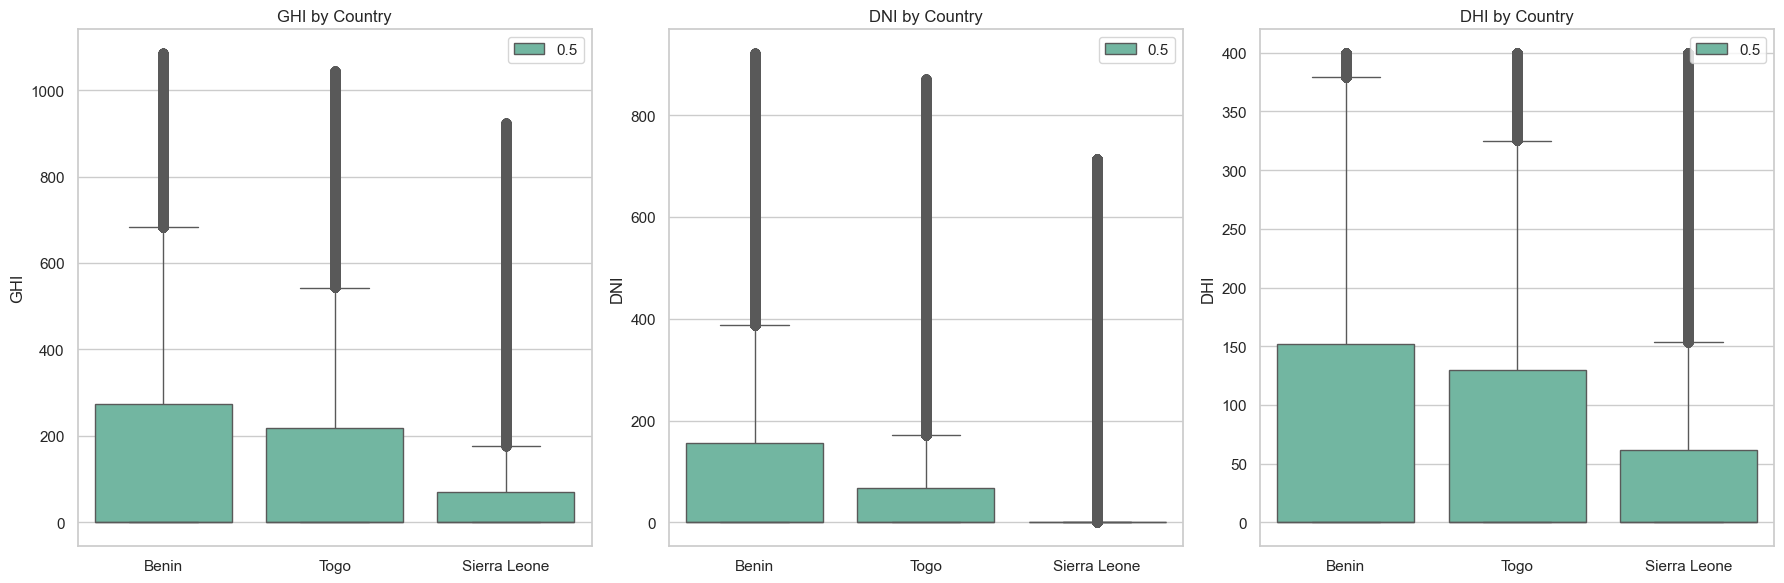

In [2]:
# Set style
sns.set(style="whitegrid")

# Metrics to plot
metrics = ['GHI', 'DNI', 'DHI']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each metric
for i, metric in enumerate(metrics):
    sns.boxplot(
        data=df_all,
        x='country',
        y=metric,
        ax=axes[i],
        hue=0.5,
        palette='Set2'
    )
    axes[i].set_title(f'{metric} by Country')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(metric)

print(" Plotting Boxplots Side-by-Side\n")

plt.tight_layout()
plt.show()


In [3]:
# Group by country and compute summary stats
summary = df_all.groupby('country')[metrics].agg(['mean', 'median', 'std'])

# Optional: round for readability
summary = summary.round(2)

# Display the summary table
print("Summary Statistics by Country:\n")
print(summary)

Summary Statistics by Country:

                 GHI                    DNI                   DHI         \
                mean median     std    mean median     std   mean median   
country                                                                    
Benin         176.63    0.0  296.40  140.81    0.0  254.43  74.63    0.0   
Sierra Leone  108.36    0.0  219.61   68.71    0.0  167.97  60.67    0.0   
Togo          157.07    0.0  280.23  120.87    0.0  233.88  68.97    0.0   

                      
                 std  
country               
Benin         115.10  
Sierra Leone  112.85  
Togo          114.42  


Statistical Testing

In [4]:
ghi_benin = df_benin['GHI'].dropna()
ghi_togo = df_togo['GHI'].dropna()
ghi_sierra = df_sierraleone['GHI'].dropna()

f_stat, p_value = stats.f_oneway(ghi_benin, ghi_togo, ghi_sierra)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)



ANOVA F-statistic: 8726.222556660789
ANOVA p-value: 0.0
